In [3]:
# Import libraries
import statistics as stat
import pandas as pd
from scipy import optimize,arange
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

# Load data, select relevant series, set year as index, (display data)
df = pd.read_csv("data/V3_timeseries__postrev_I1Y_19-Oct-2018.csv")
df = df[['year','ProfitK','ProfitY','RF', 'growthpop','priceinvt','PD','growthTFP','ik','EmpPop']]
df = df.set_index('year')
df = df.loc[1984:2016]
#df


df_2 = df.copy()
#print(list(df.columns))

# Calculate averages and insert to DataFrame
for var in list(df.columns):
    mean1 = stat.mean(df.loc[1984:2000,var])
    mean2 = stat.mean(df.loc[2001:2016,var])
    name1 =str("P1_") + str(var)
    name2 =str("P2_") + str(var)
    df_2[name1] = mean1
    df_2[name2] = mean2
    df_2.loc[1984:2000,name2] = np.nan
    df_2.loc[2001:2016,name1] = np.nan

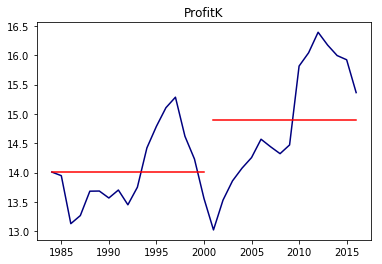

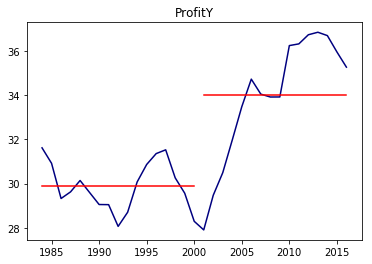

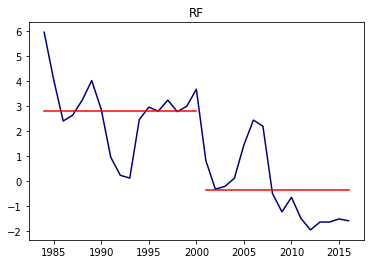

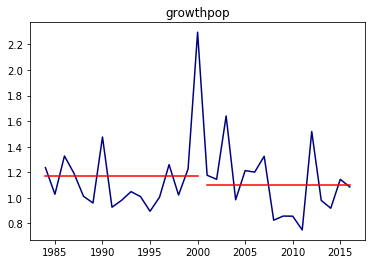

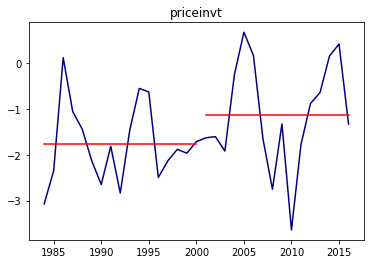

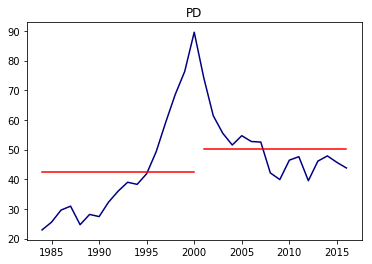

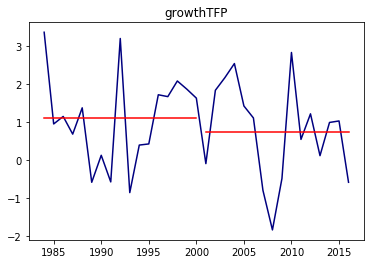

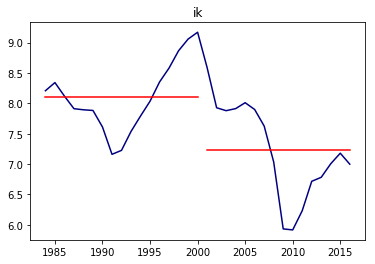

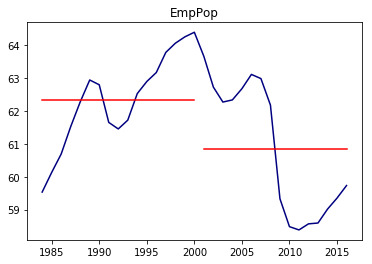

<Figure size 432x288 with 0 Axes>

In [20]:
for var in list(df.columns):
    
    series1 = str(var)
    series2 = str("P1_") + str(var)
    series3 = str("P2_") + str(var)
    
    ax = plt.gca()
    df_2.plot(kind='line',y=series1, color='navy', ax=ax, legend=False, title=str(var))
    df_2.plot(kind='line',y=series2, color='red', ax=ax, legend=False)
    df_2.plot(kind='line',y=series3, color='red', ax=ax, legend=False)
    ax.set_xlabel("")
    plt.show()
    plt.savefig(var,format="pdf")